In [105]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

os.getcwd()
import datetime


In [106]:
def make_fig(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        image = images[i]
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
        plt.title(titles[i])
    plt.show()

def make_fig_gray(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
    plt.show()

def display_image(image, title='original', colored=None):
    plt.figure(figsize=(10, 10))
    if colored:
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
    else:
        plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.title(title)
    plt.show()

def display2Images(img1, img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

In [107]:

def detect_shape(contour):
    peri = cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, 0.04 * peri, True)
    
    if len(approx) == 3:
        return "triangle"
    elif len(approx) == 4:
      return "sq"
      '''  x, y, w, h = cv.boundingRect(approx)
        aspect_ratio = w / float(h)
        if 0.95 <= aspect_ratio <= 1.05:
            return "square"
        else:
            return "rectangle"'''
    else:
        # Calculate the area and circularity
        area = cv.contourArea(contour)
        if peri == 0:
            return "unknown"
        circularity = 4 * np.pi * (area / (peri ** 2))

        # Check for circularity (close to 1 means it's a circle)
        if circularity > 0.8:
            return "circle"
        else:
            if not cv.isContourConvex(contour):
                return "X"
            else:
                return "unknown"

In [108]:
def save_image(img_copy):
    now = datetime.datetime.now()    
    timestamp = now.strftime("%M_%S")
    output_dir = 'output'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_path = os.path.join(output_dir, f'sample_output_{timestamp}.png')
    cv.imwrite(output_path, img_copy)
    i += 1
    print(f"Image saved at {output_path}")

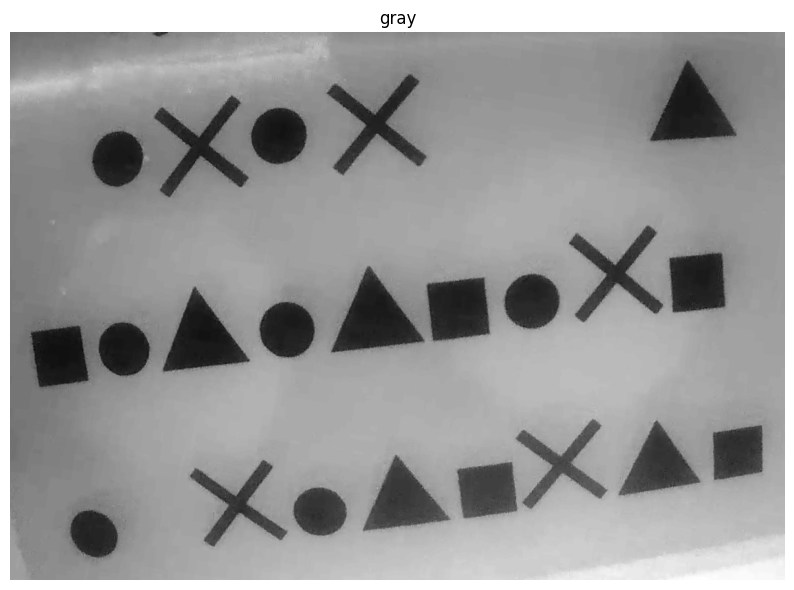

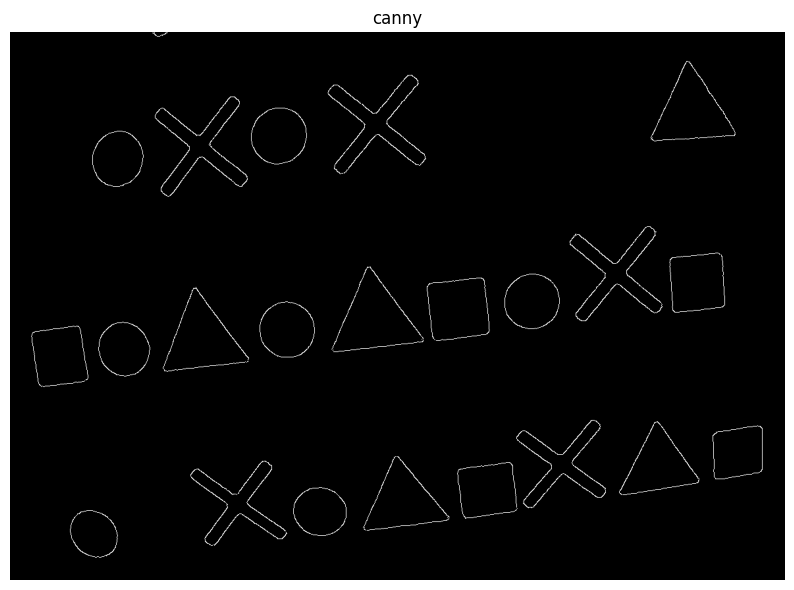

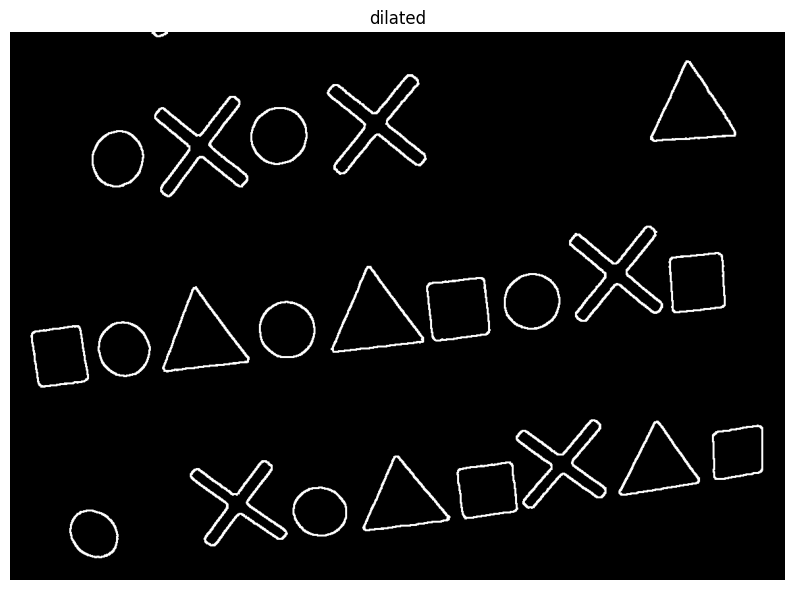

In [109]:
img = cv.imread('input/frame1.png')
img_copy = img.copy()
#display_image(img_copy)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display_image(gray,"gray")
gaussian = cv.GaussianBlur(gray, (9, 9), 0)
#display_image(gaussian,"gaussian_blur_stronger")

median = cv.medianBlur(gaussian, 9)
#display_image(median,"median+ gauusian")

canny = cv.Canny(median,15,40)
display_image(canny,"canny")

kernel = np.ones((3, 3), np.uint8)
dilated = cv.dilate(canny, kernel, iterations=1)
display_image(dilated ,"dilated")

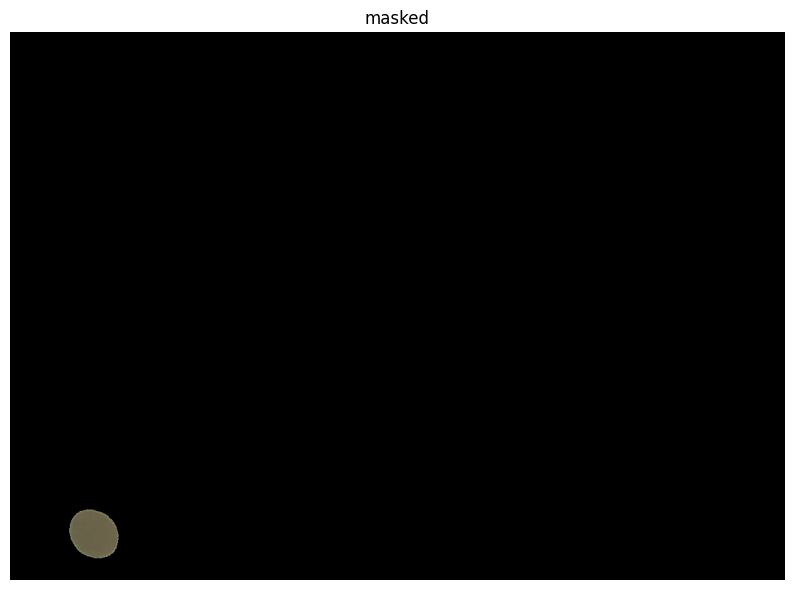

circle


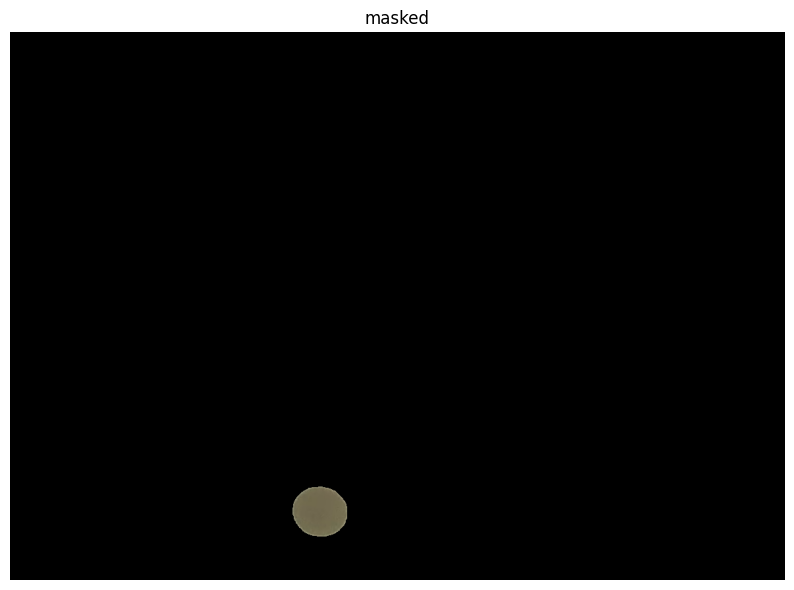

circle


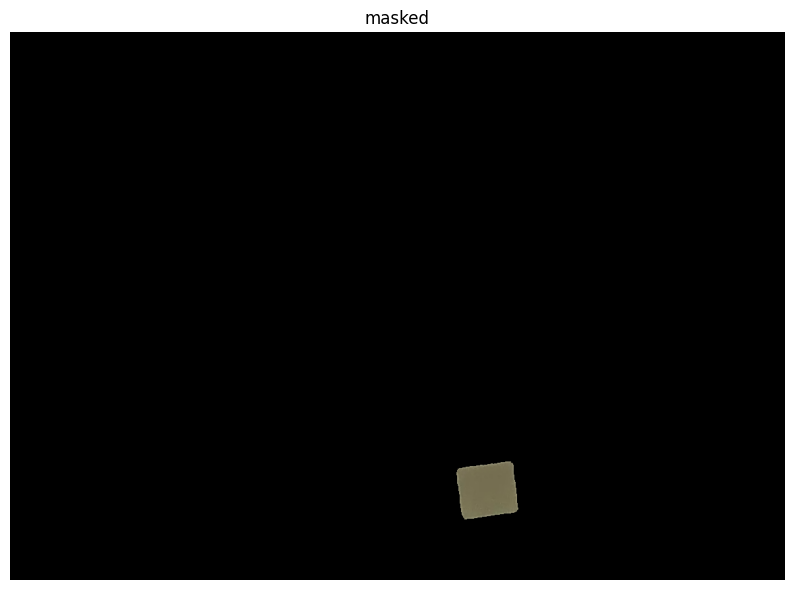

sq


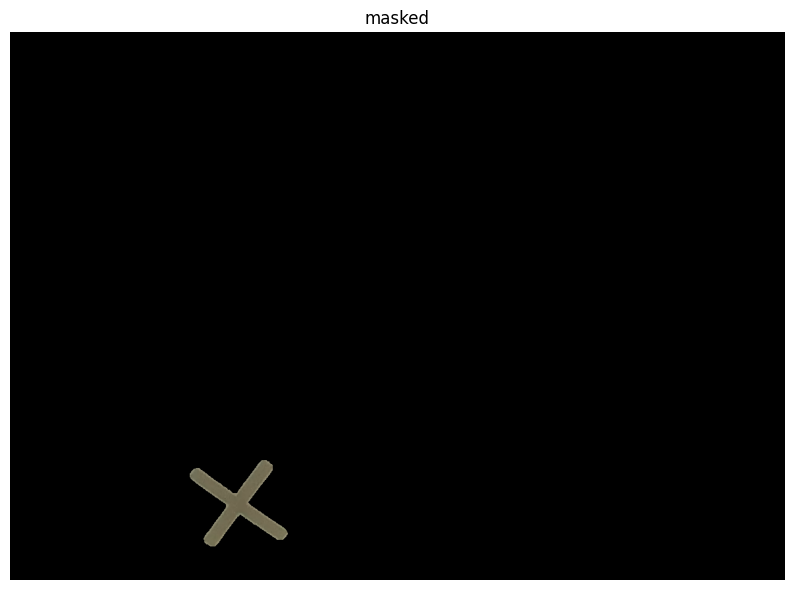

X


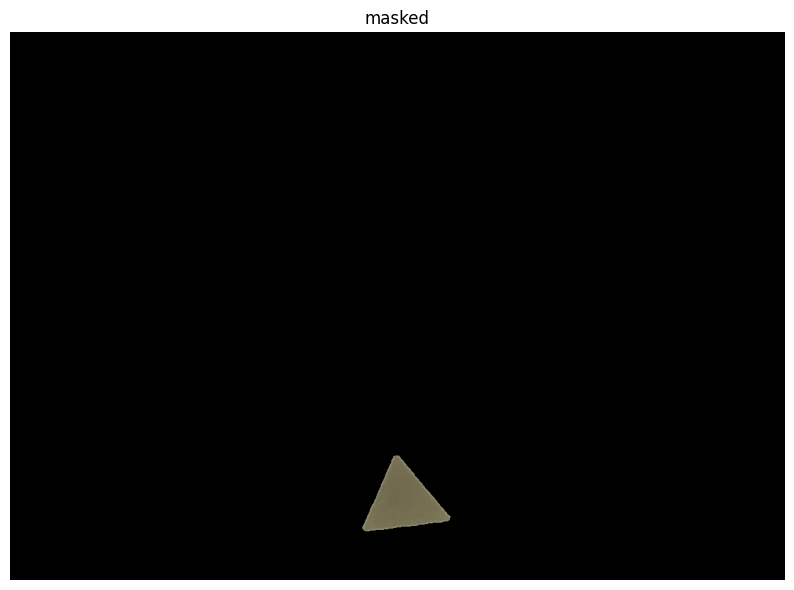

triangle


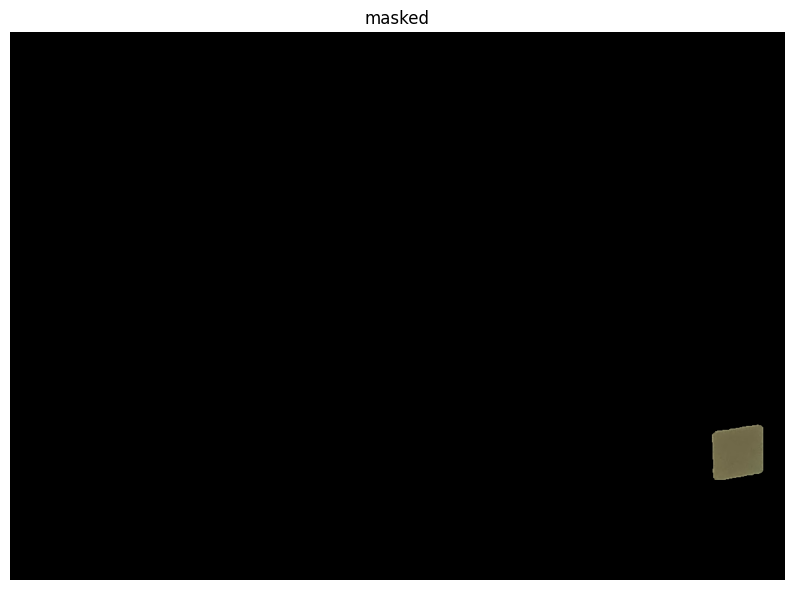

sq


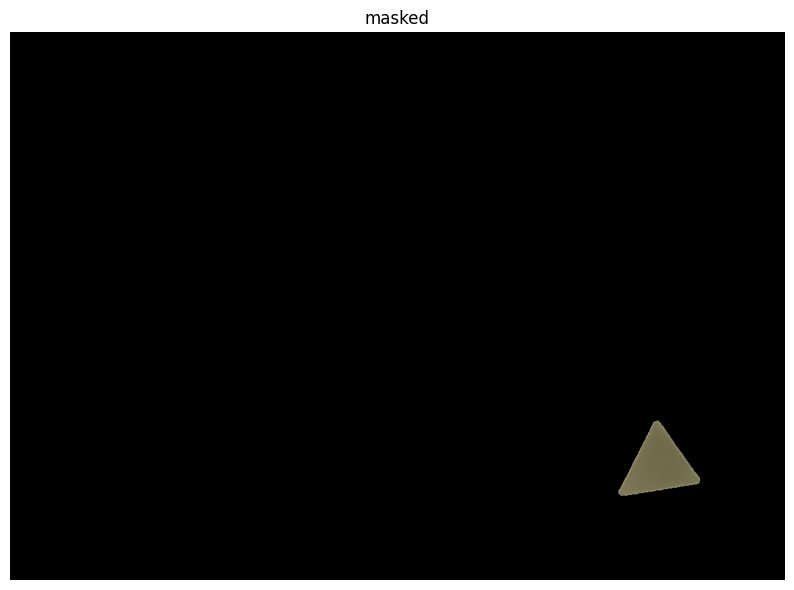

triangle


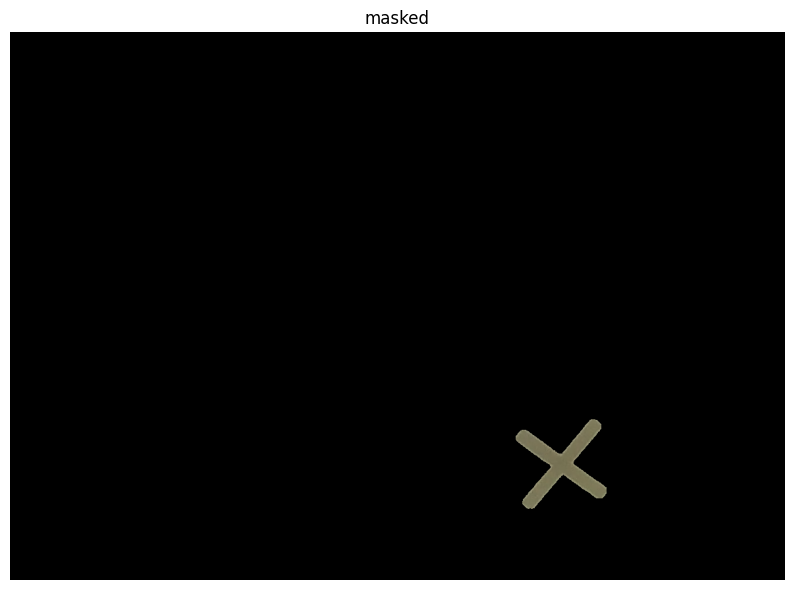

X


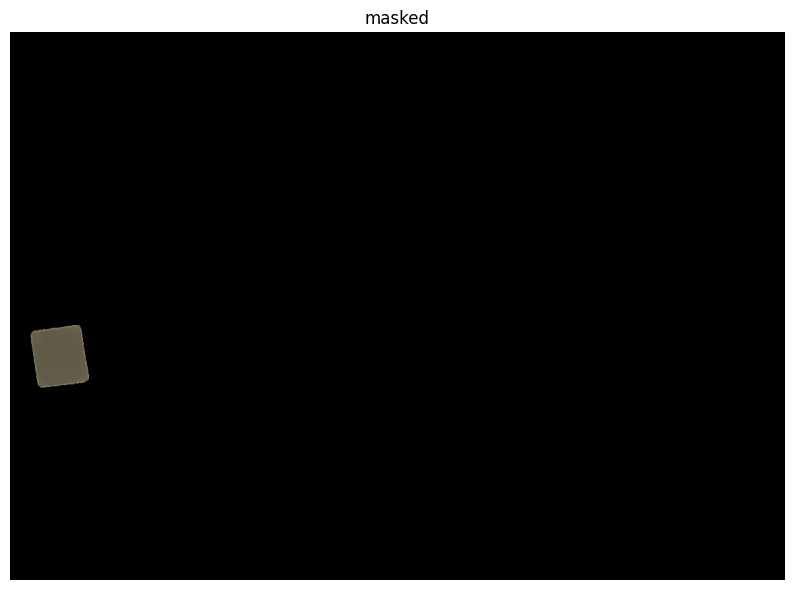

sq


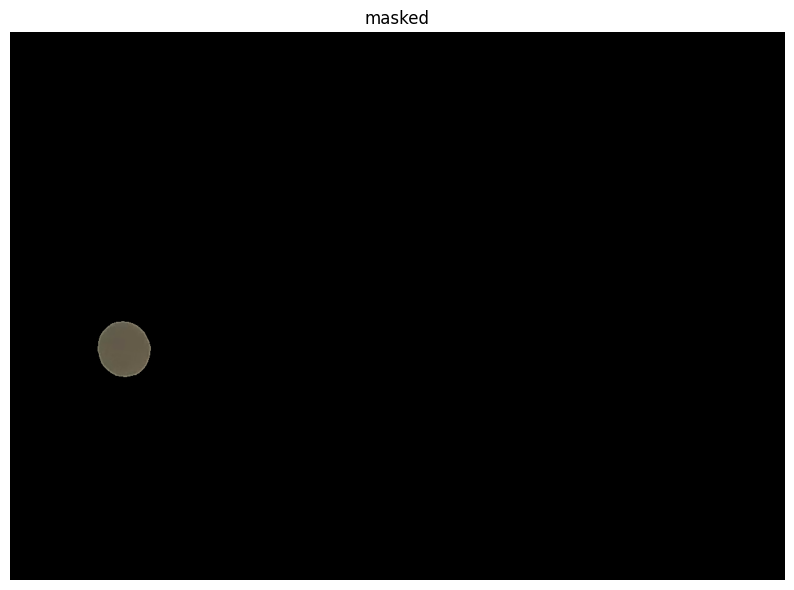

circle


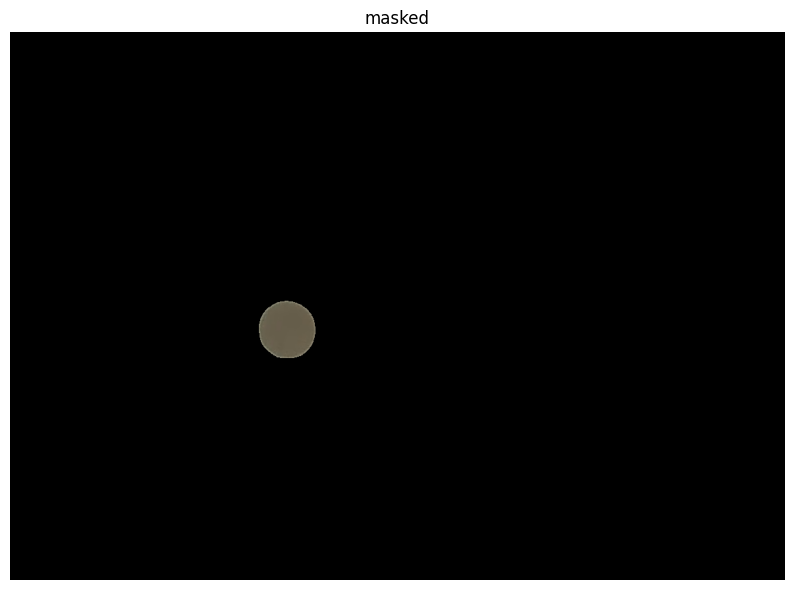

circle


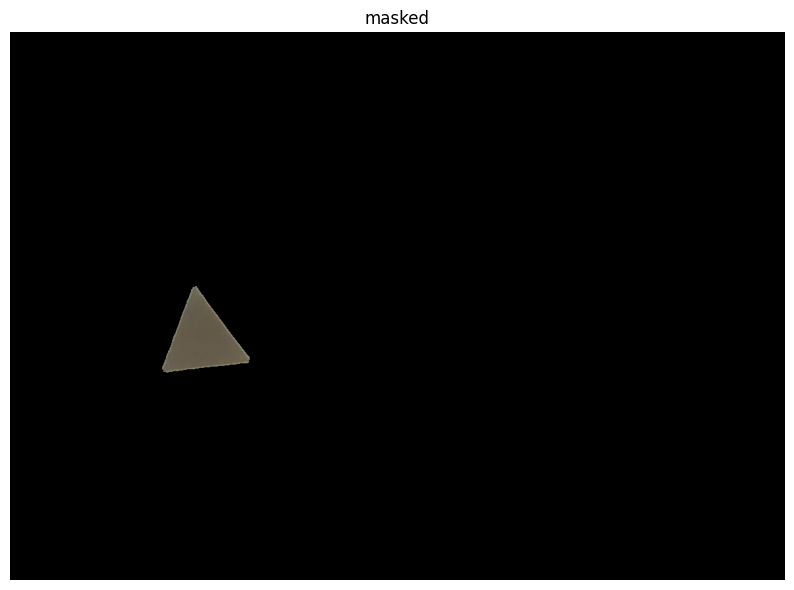

triangle


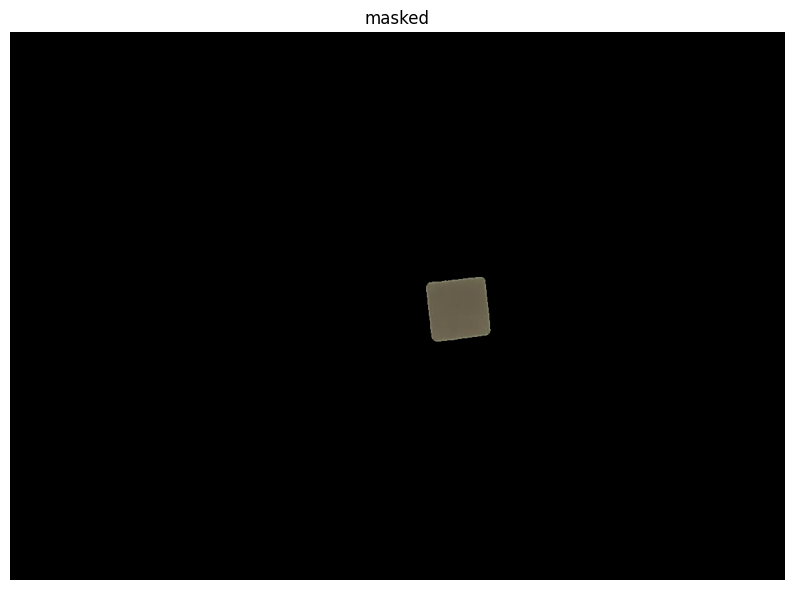

sq


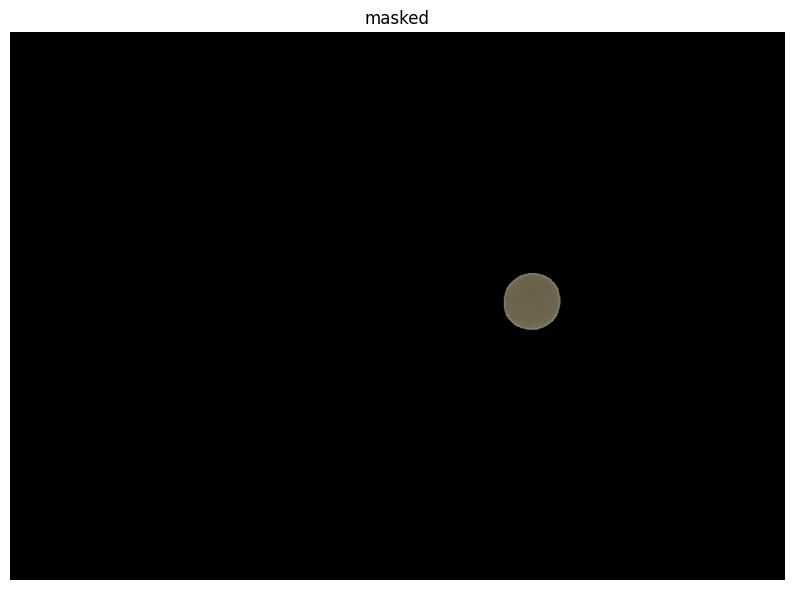

circle


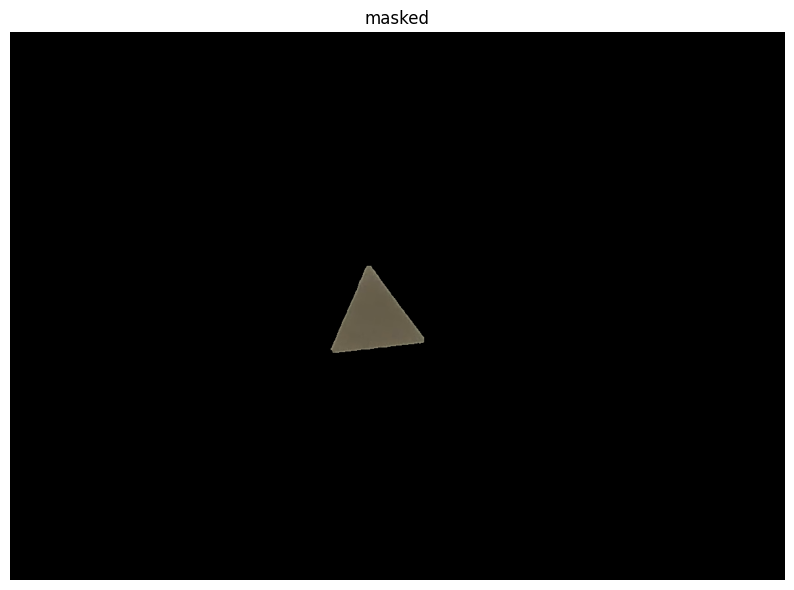

triangle


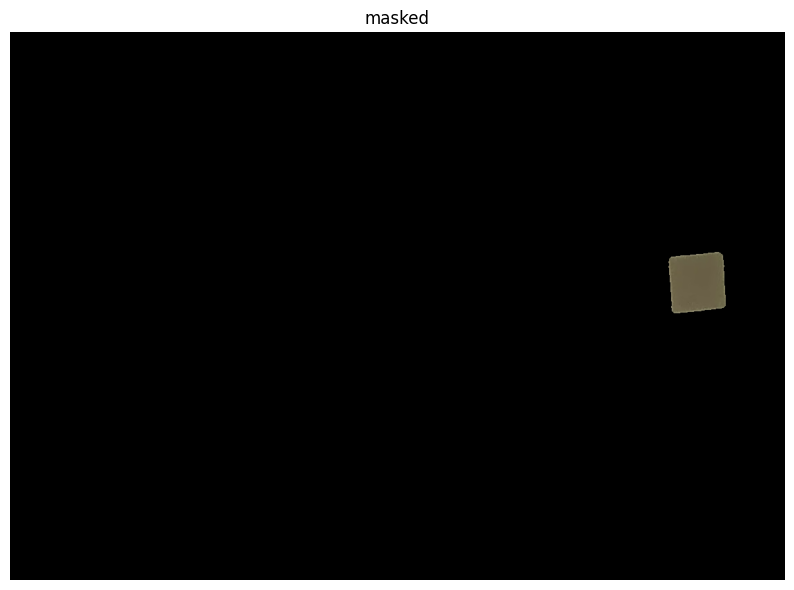

sq


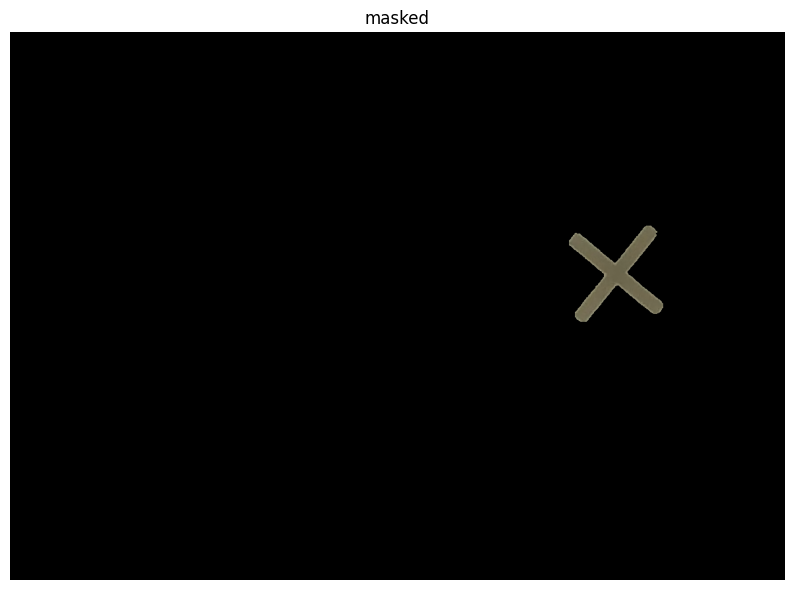

X


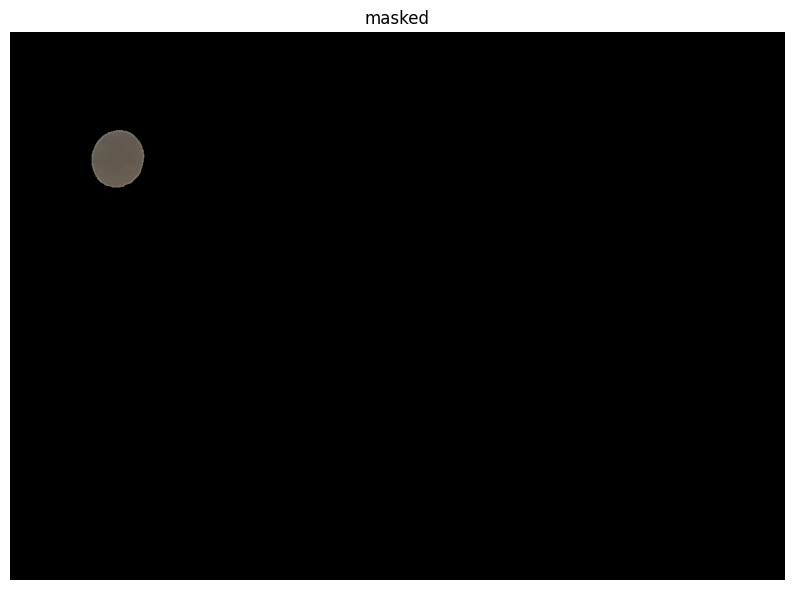

circle


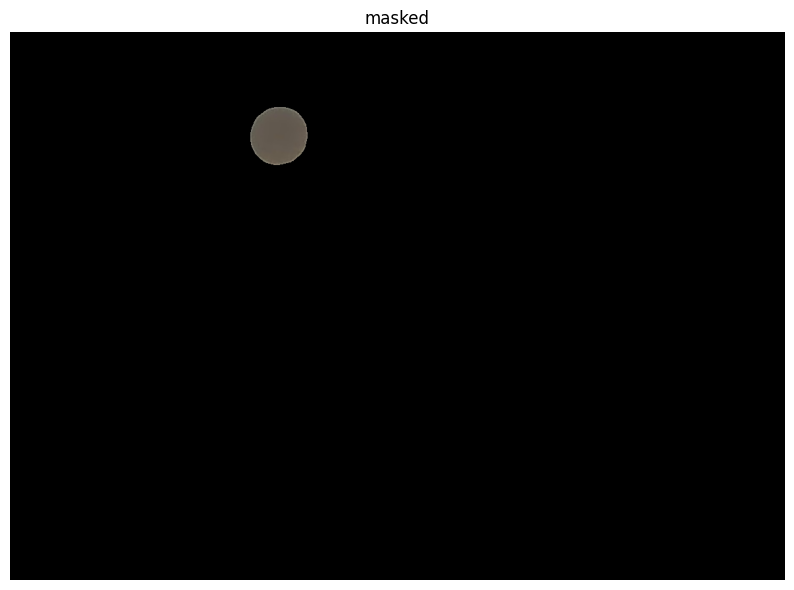

circle


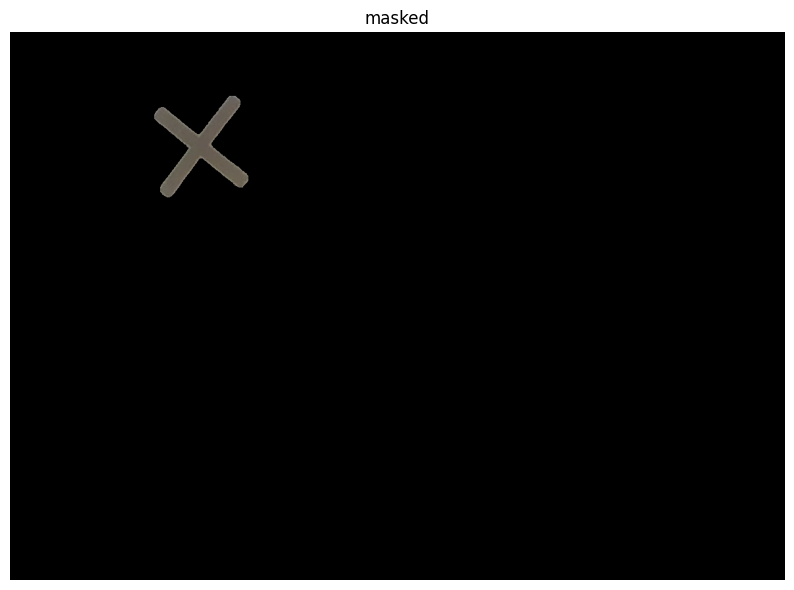

X


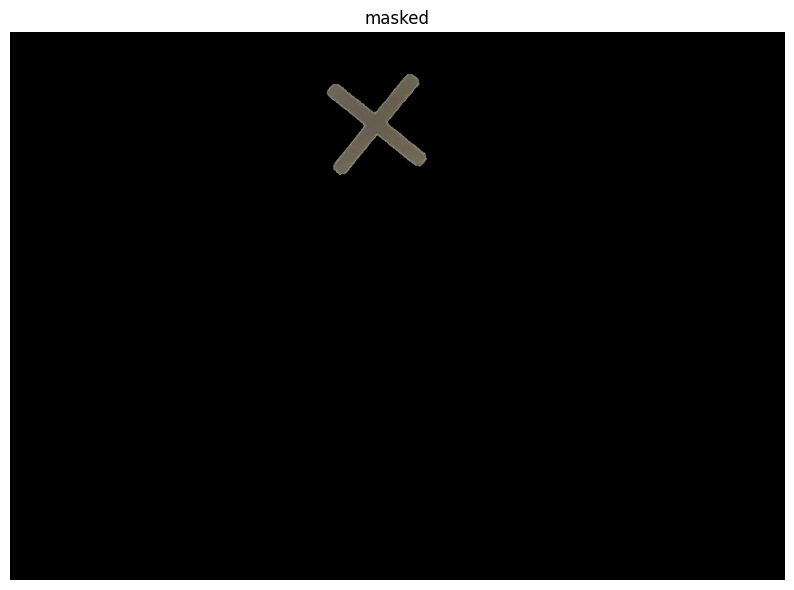

X


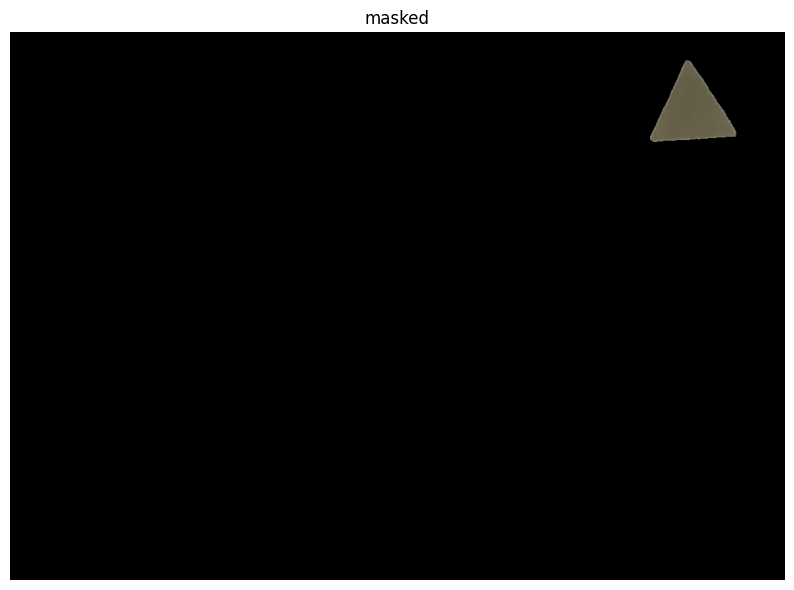

triangle


In [110]:

contours, hierarchy = cv.findContours(dilated , cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
filtered_contours = []

min_area = 1000
for contour in contours:
    area = cv.contourArea(contour)
    if area > min_area:
        filtered_contours.append(contour)

for contour in filtered_contours:

    mask = np.zeros(img.shape[:2], np.uint8)
    
    # Draw each contour on mask
    cv.drawContours(mask, [contour],-1, 255, -1)

    # Apply mask to image
    masked = cv.bitwise_and(img, img, mask=mask)

    display_image(masked,"masked")
    shape = detect_shape(contour)
    print(shape)


    if shape == "triangle":
        color = (255, 0, 0)  # Red for triangle
    elif shape == "sq":
        color = (0, 255, 0)  # Green for square/rectangle
    elif shape == "circle":
        color = (0, 0, 255)  # Blue for circle
    elif shape=='X':
        color = (255, 225, 0)
    else:
        color = (255, 255, 255)

    cv.drawContours(img_copy, [contour], -1, color, 3)

Number of contours 22


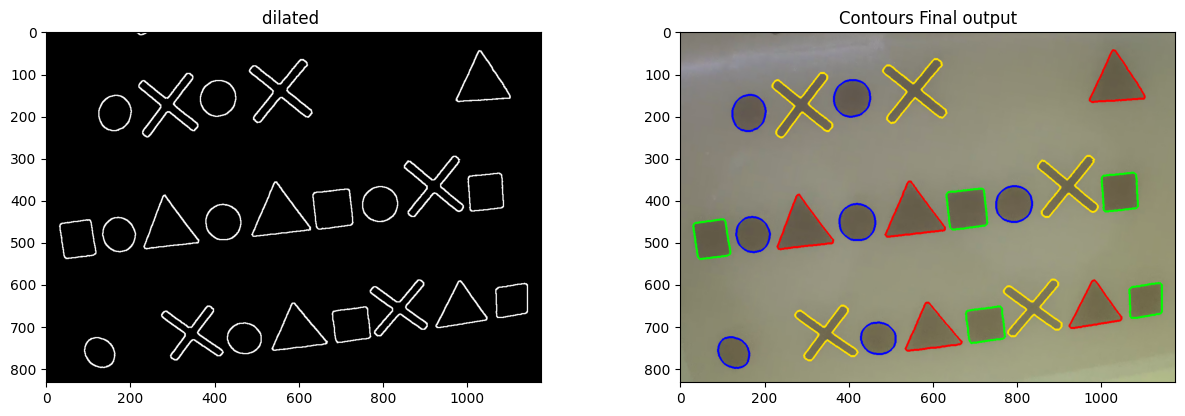

UnboundLocalError: cannot access local variable 'i' where it is not associated with a value

In [111]:

contours, hierarchy = cv.findContours(dilated , cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
filtered_contours = []
# you can add Max_area to gain more acc and handle some like hand or fingers on the photo
min_area = 1000
for contour in contours:
    area = cv.contourArea(contour)
    if area > min_area:
        filtered_contours.append(contour)



for contour in filtered_contours:
    shape = detect_shape(contour)

    if shape == "triangle":
        color = (255, 0, 0)  # Red for triangle
    elif shape == "sq":
        color = (0, 255, 0)  # Green for square/rectangle
    elif shape == "circle":
        color = (0, 0, 255)  # Blue for circle
    elif shape=='X':
        color = (255, 225, 0)
    else:
        color = (255, 255, 255)

    cv.drawContours(img_copy, [contour], -1, color, 3)





print(f"Number of contours {len(filtered_contours)}")
#print(filtered_contours[0])
images = [dilated, img_copy]
titles = ["dilated ", "Contours Final output"]
plots = [2, 2]
size = (15, 10)
make_fig_gray(images, titles, plots, size)

save_image(img_copy)

